# <center><font color = 'blue'>*ADRIS MISRA*</font></center>

**Github repository:** https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-adris-misra

# `Project - Credit Card Customer Segmentation`

### `Background:` 
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

### `Objective:`
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### `Domain:` 
- Banking

### `Key Questions:`
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customer

### `Data Description:`

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer

### Steps to follow:

1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods. (5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [1]:
# Import warnings to suppress runtime warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import basic libraries for data and visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [3]:
# Import models and relevent class / functions

from sklearn import metrics

import pandas as pd

from scipy.stats import zscore

from scipy.spatial.distance import cdist, pdist

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster

In [4]:
# Import data

customer = pd.read_excel("Credit Card Customer Data.xlsx")

cust = customer.copy()

In [5]:
# checking sample head data

cust.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
# checking sample tail data

cust.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [7]:
# shape of dataframe

cust.shape

(660, 7)

In [8]:
# Checking data type

cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [9]:
# Check for Missing Values

cust.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [10]:
# check basic stats

cust.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [11]:
# Count of 0 in each column

(cust == 0).sum(axis=0)

Sl_No                    0
Customer Key             0
Avg_Credit_Limit         0
Total_Credit_Cards       0
Total_visits_bank      100
Total_visits_online    144
Total_calls_made        97
dtype: int64

In [12]:
# drop Sl No and Customer Key before EDA

cust.drop(columns=['Sl_No','Customer Key'], inplace=True)

<font color='green'>**Preliminary data analysis:** 
- There are 660 rows and 7 columns in the dataset
- There is no null or missing value in any of the columns
- There are some "0" values in customer care visit columns and that should be fine if customer did not reach out.
- All the attributes are numerical
</font>

### 2. EDA: Study the data distribution in each attribute and target variable

In [13]:
# Number of unique in each column

cust.nunique()

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [14]:
# Check for Skew for all variables

cust.skew().sort_values(ascending=False)

Total_visits_online    2.225607
Avg_Credit_Limit       2.202396
Total_calls_made       0.658905
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
dtype: float64

In [15]:
# Check for Kurt for all variables

cust.kurt().sort_values(ascending=False)

Total_visits_online    5.739572
Avg_Credit_Limit       5.133842
Total_Credit_Cards    -0.369770
Total_calls_made      -0.518264
Total_visits_bank     -1.104274
dtype: float64

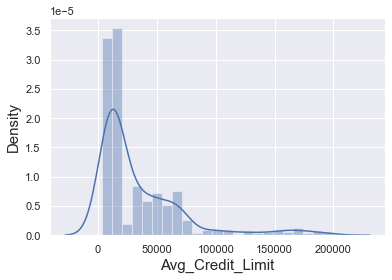

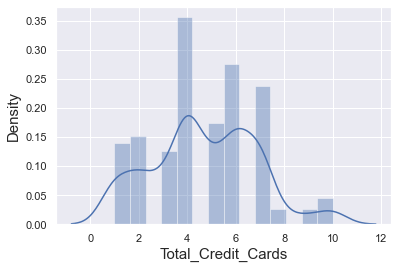

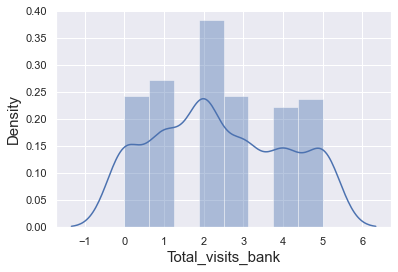

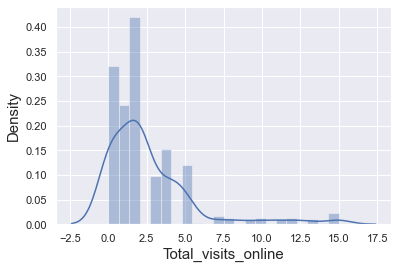

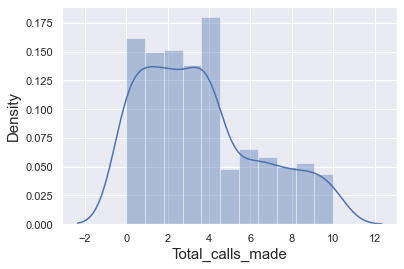

In [16]:
# continues columns plot

for col in cust.columns:
    sns.distplot(x=cust[col]);
    plt.xlabel(col,size=15);
    plt.ylabel('Density',size=15);
    plt.show();

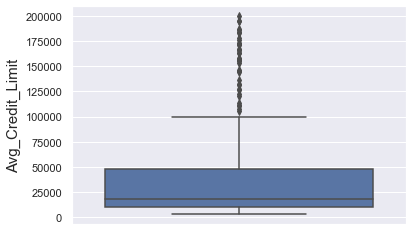

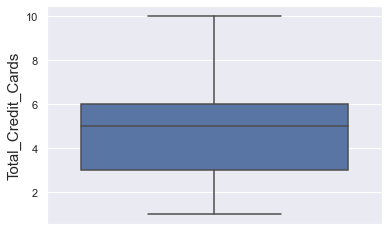

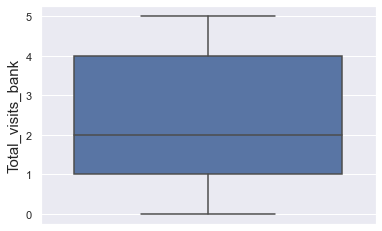

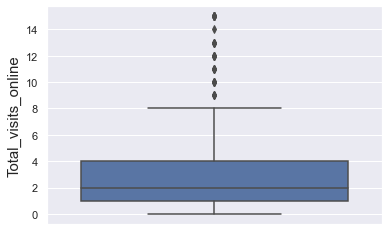

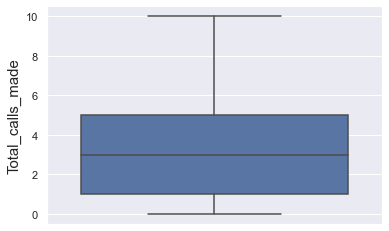

In [17]:
# Boxplot to further see outliers

for col in cust.columns:
    sns.boxplot(y=cust[col]);
    plt.ylabel(col, size=15);
    plt.show()

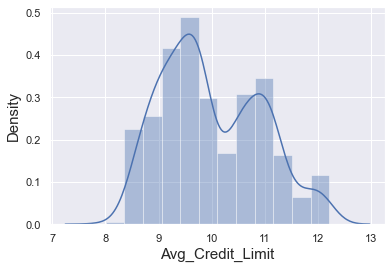

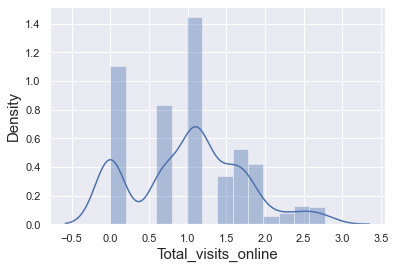

In [18]:
# continues columns log plot

for col in ['Avg_Credit_Limit','Total_visits_online']:
    sns.distplot(x=np.log(cust[col]+1));
    plt.xlabel(col,size=15);
    plt.ylabel('Density',size=15);
    plt.show();

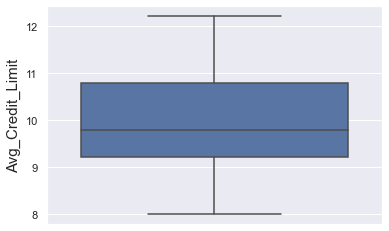

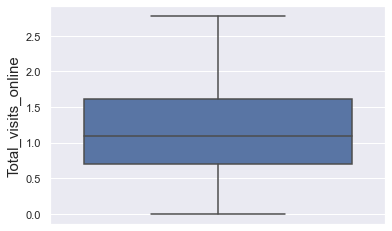

In [19]:
# Boxplot of log to see if outliers gets removed

for col in ['Avg_Credit_Limit','Total_visits_online']:
    sns.boxplot(y=np.log(cust[col]+1));
    plt.ylabel(col, size=15);
    plt.show()

<font color='green'>**Observation:**
- There are some outliers in Total_visits_online and Avg_Credit_Limit fields
- Total_visits_online and Avg_Credit_Limit are positively skewed
- Treating those with log solves the outlier issue
</font>

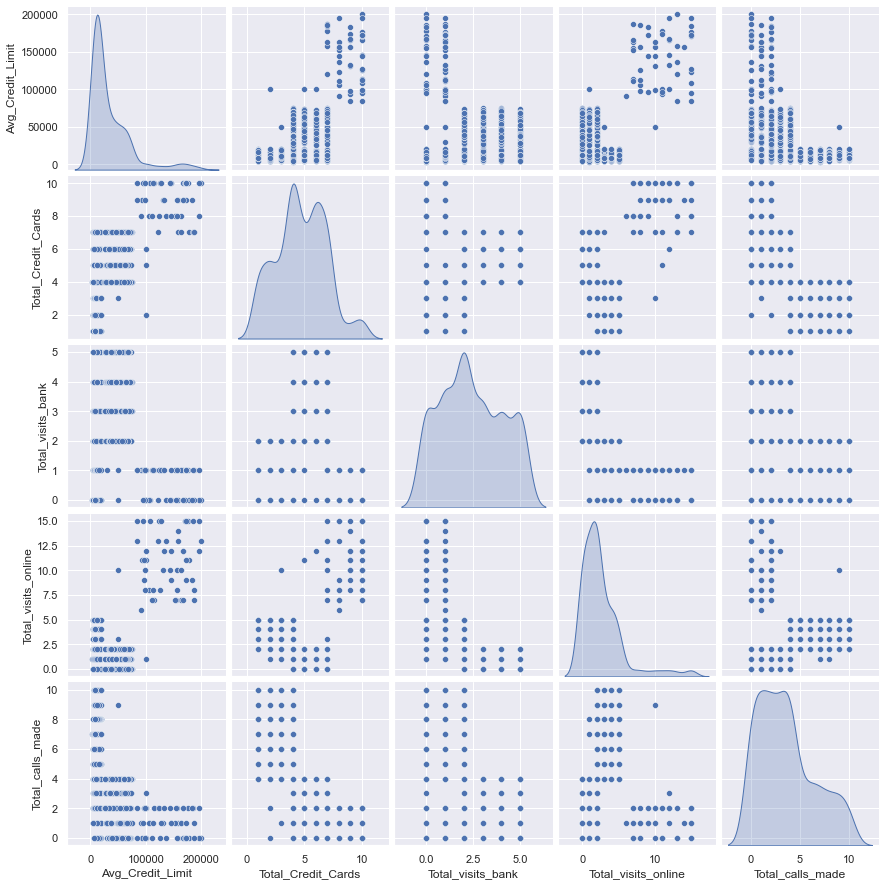

In [20]:
# pairplot for intervariable relations

sns.pairplot(cust, diag_kind ='kde');

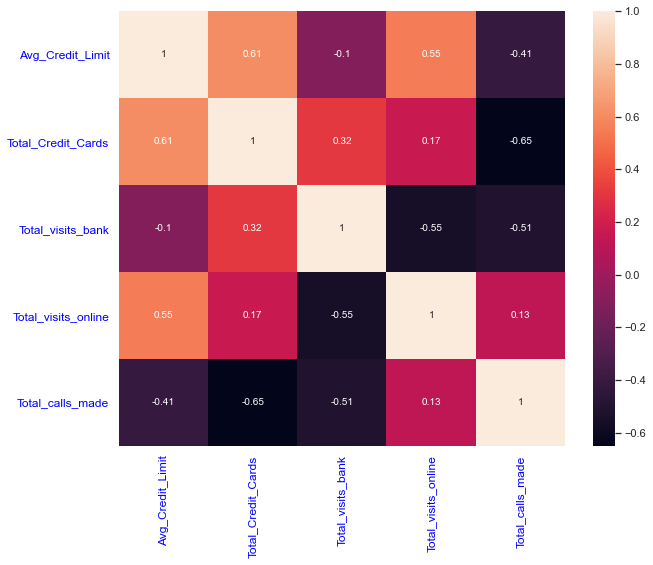

In [21]:
# correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(cust.corr(), annot=True, annot_kws={"size":10});
plt.xticks(rotation=90, size=12, color='blue');
plt.yticks(rotation=0, size=12, color='blue');

<font color='green'>**Observation:**
- There doesn't seem to have much correlation between variables
- Based on KDE plot there might be between 3 to 5 clusters
</font>

### 3. Feature Engineering and getting data model ready

In [22]:
# taking log of Total_visits_online and Avg_Credit_Limit and drop originals

cust['log_Avg_Credit_Limit'] = np.log(cust['Avg_Credit_Limit'])
cust['log_Total_visits_online'] = np.log(cust['Total_visits_online']+1)

cust.drop(columns=['Avg_Credit_Limit','Total_visits_online'], inplace=True)

In [23]:
# checking sample head data

cust.head(10)

,Total_Credit_Cards,Total_visits_bank,Total_calls_made,log_Avg_Credit_Limit,log_Total_visits_online
0,2,1,0,11.512925,0.693147
1,3,0,9,10.819778,2.397895
2,7,1,4,10.819778,1.386294
3,5,1,4,10.308953,0.693147
4,6,0,3,11.512925,2.564949
5,3,0,8,9.903488,0.693147
6,5,0,2,11.512925,2.484907
7,3,0,1,9.615805,0.693147
8,2,0,2,8.517193,1.098612
9,4,0,7,8.006368,0.693147


In [24]:
# checking info of modified dataframe

cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Total_Credit_Cards       660 non-null    int64  
 1   Total_visits_bank        660 non-null    int64  
 2   Total_calls_made         660 non-null    int64  
 3   log_Avg_Credit_Limit     660 non-null    float64
 4   log_Total_visits_online  660 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 25.9 KB


In [25]:
# scaling the data to convert everything in same scale

cust = cust.apply(zscore)

### 4. K-means clustering:

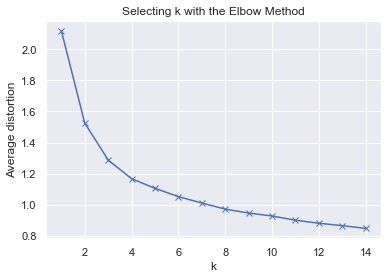

In [26]:
#Finding optimal no. of clusters - Elblow Method using euclidean distance

clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cust)
    prediction=model.predict(cust)
    meanDistortions.append(sum(np.min(cdist(cust, model.cluster_centers_, 'euclidean'), axis=1)) / cust.shape[0])


plt.plot(clusters, meanDistortions, 'bx-');
plt.xlabel('k');
plt.ylabel('Average distortion');
plt.title('Selecting k with the Elbow Method');

<font color='green'>**Observation:**
- There is no clear elbow, but 4 seems to be a good starting point
</font>

In [27]:
#Set the value of k=4 for kmeans

kmeans = KMeans(n_clusters=4, n_init = 15, random_state=7)

kmeans.fit(cust)

KMeans(n_clusters=4, n_init=15, random_state=7)

In [28]:
#Clculate the centroids for the columns

centroids = kmeans.cluster_centers_

centroids

array([[ 0.38864728,  0.61254187, -0.53386701,  0.83890638, -0.6398743 ],
       [-1.05962278, -0.9015185 ,  1.14810882, -0.72877143,  0.63976448],
       [ 0.35407448,  0.73701562, -0.57810186, -0.71137841, -0.61953733],
       [ 1.86222621, -1.10576269, -0.87432983,  1.96648996,  2.00575928]])

In [29]:
# Put centroids in a dataframe

centroid_df = pd.DataFrame(centroids, columns = list(cust))

In [30]:
centroid_df

,Total_Credit_Cards,Total_visits_bank,Total_calls_made,log_Avg_Credit_Limit,log_Total_visits_online
0,0.388647,0.612542,-0.533867,0.838906,-0.639874
1,-1.059623,-0.901518,1.148109,-0.728771,0.639764
2,0.354074,0.737016,-0.578102,-0.711378,-0.619537
3,1.862226,-1.105763,-0.874330,1.966490,2.005759


In [31]:
## creating a new dataframe only for labels and converting it into categorical variable

df_labels_kmeans = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels_kmeans['labels'] = df_labels_kmeans['labels'].astype('category')

# Get label for each point and add back to dataframe

In [32]:
# Joining the label dataframe with the data frame.

df_labeled_kmeans = cust.join(df_labels_kmeans)

df_labeled_kmeans

,Total_Credit_Cards,Total_visits_bank,Total_calls_made,log_Avg_Credit_Limit,log_Total_visits_online,labels
0,-1.249225,-0.860451,-1.251537,1.630478,-0.468807,0
1,-0.787585,-1.473731,1.891859,0.885387,1.937062,1
2,1.058973,-0.860451,0.145528,0.885387,0.509415,0
3,0.135694,-0.860451,0.145528,0.336281,-0.468807,0
4,0.597334,-1.473731,-0.203739,1.630478,2.172822,3
...,...,...,...,...,...,...
655,2.443892,-0.860451,-1.251537,1.619674,1.937062,3
656,2.443892,-0.860451,-0.553005,1.443058,2.277409,3
657,1.520613,-0.860451,-0.902271,2.029885,1.802554,3
658,2.443892,-0.860451,-1.251537,2.213443,2.465858,3


In [33]:
# checking counts per group

df_labeled_kmeans['labels'].value_counts()

1    224
0    219
2    167
3     50
Name: labels, dtype: int64

In [34]:
# Calculate Silhouette Coefficient

metrics.silhouette_score(cust, df_labeled_kmeans['labels'], metric='euclidean',random_state=7)

0.37635776485370054

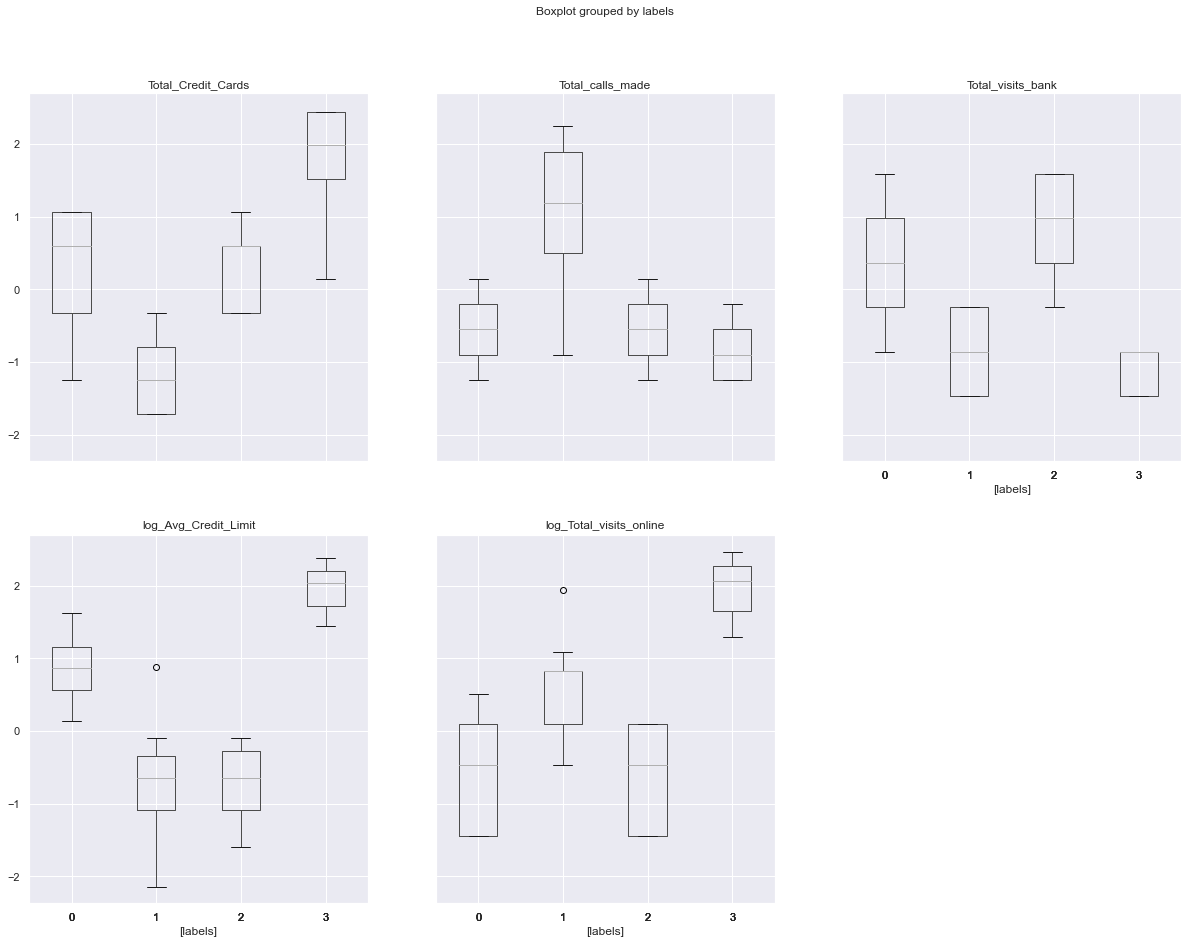

In [35]:
# Boxplot for the created labels

df_labeled_kmeans.boxplot(by = 'labels',  layout=(2,3), figsize=(20, 15));

<font color='green'>**Observation:**
- Bloxplots are creating groups for most of the featutes whereas there are significant overlap

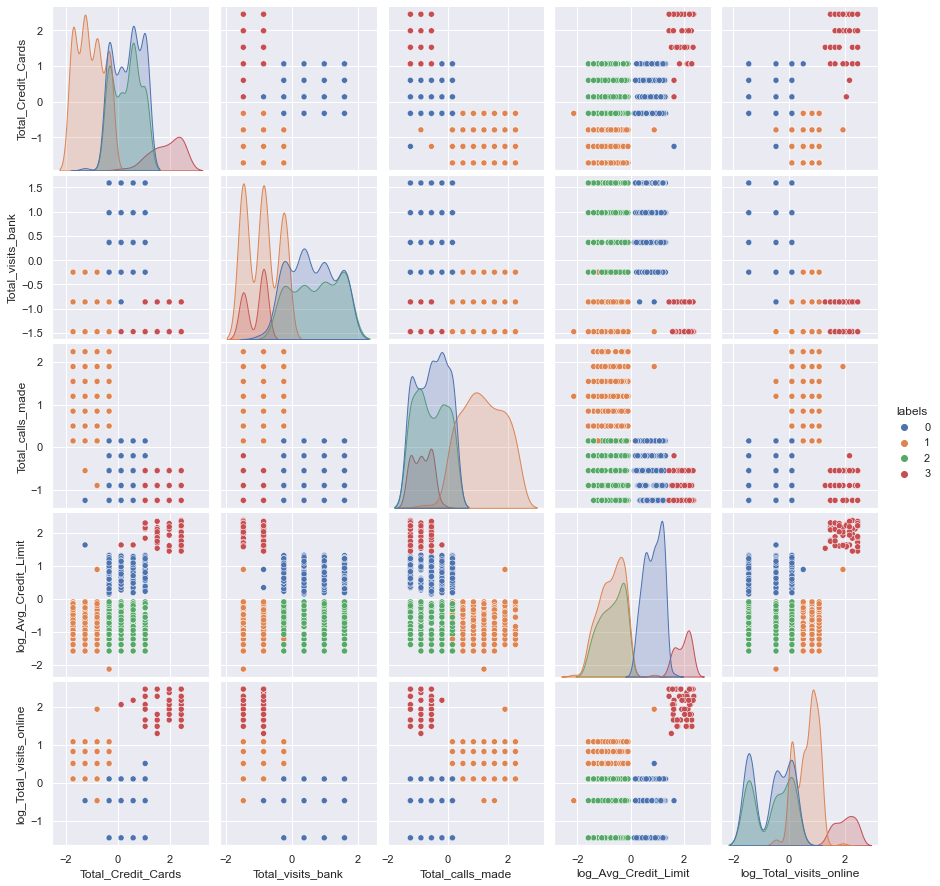

In [36]:
# Checking how clusters are being formed by pairplot

sns.pairplot(df_labeled_kmeans,diag_kind='kde',hue='labels');

### 5. Hierarchical clustering:

In [37]:
# checking linkages multiple metrices and methods for best Cophenetic correlation


dfCophenetCorr = pd.DataFrame(columns=['Metric','Method','cophenet_corr'])


for metc in ['chebyshev','cityblock','euclidean','jaccard','mahalanobis']:
    if metc == 'euclidean':
        method_lst = ['single','centroid','complete', 'average', 'ward']
    else:
        method_lst = ['single','complete', 'average']
    for meth in method_lst:
        Z = linkage(cust, metric=metc, method=meth)
        cophenet_corr, coph_dists = cophenet(Z , pdist(cust))
        
        coph = {'Metric':metc,'Method':meth,'cophenet_corr':cophenet_corr}
        
        dfCophenetCorr = dfCophenetCorr.append(coph, ignore_index=True)

dfCophenetCorr.sort_values(by='cophenet_corr', ascending=False)

,Metric,Method,cophenet_corr
9,euclidean,average,0.849273
2,chebyshev,average,0.847054
7,euclidean,centroid,0.843392
5,cityblock,average,0.842587
8,euclidean,complete,0.810166
4,cityblock,complete,0.795359
1,chebyshev,complete,0.781067
10,euclidean,ward,0.764678
16,mahalanobis,average,0.726712
6,euclidean,single,0.618354


<font color='green'>**Observation:**
- Euclidean with average gives the best Cophenetic correlation, though top 4 are very close competetors.
- Let's go with top 5 for dendogram
</font>

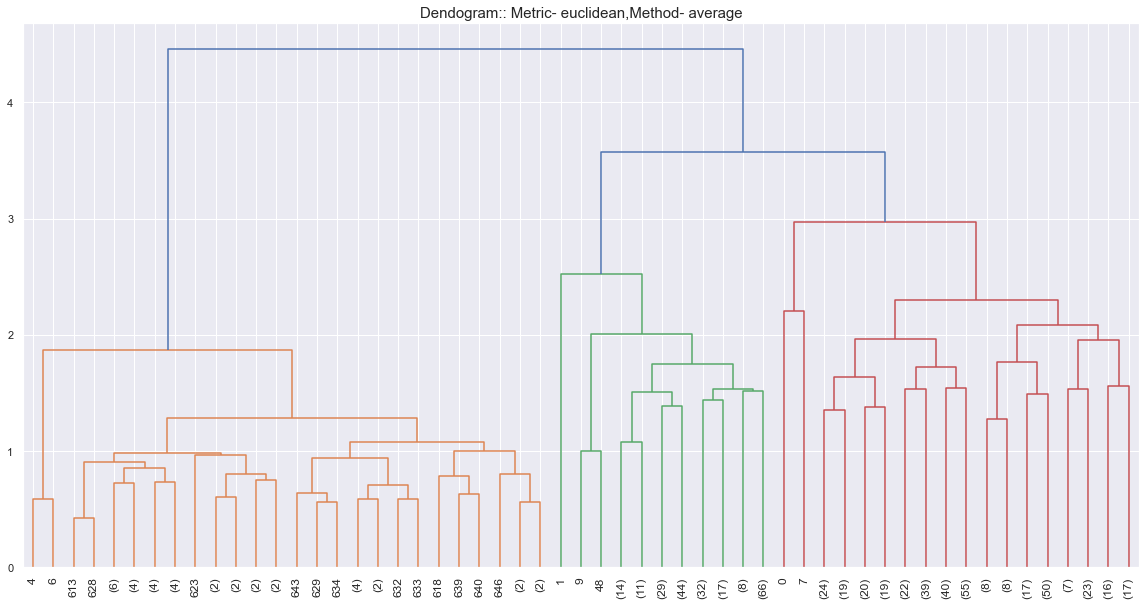

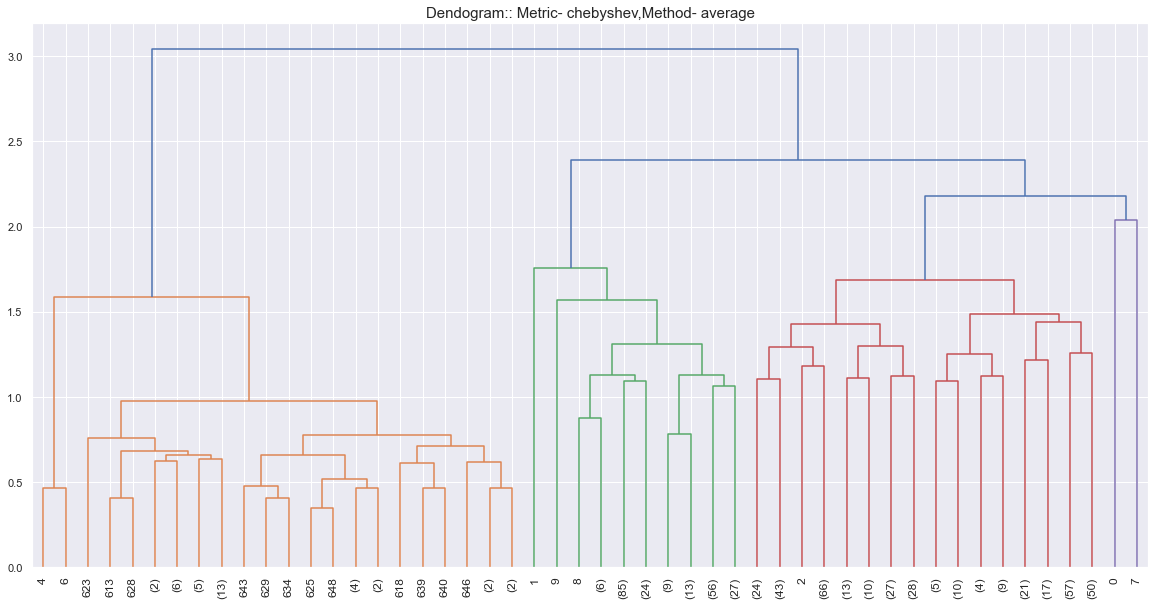

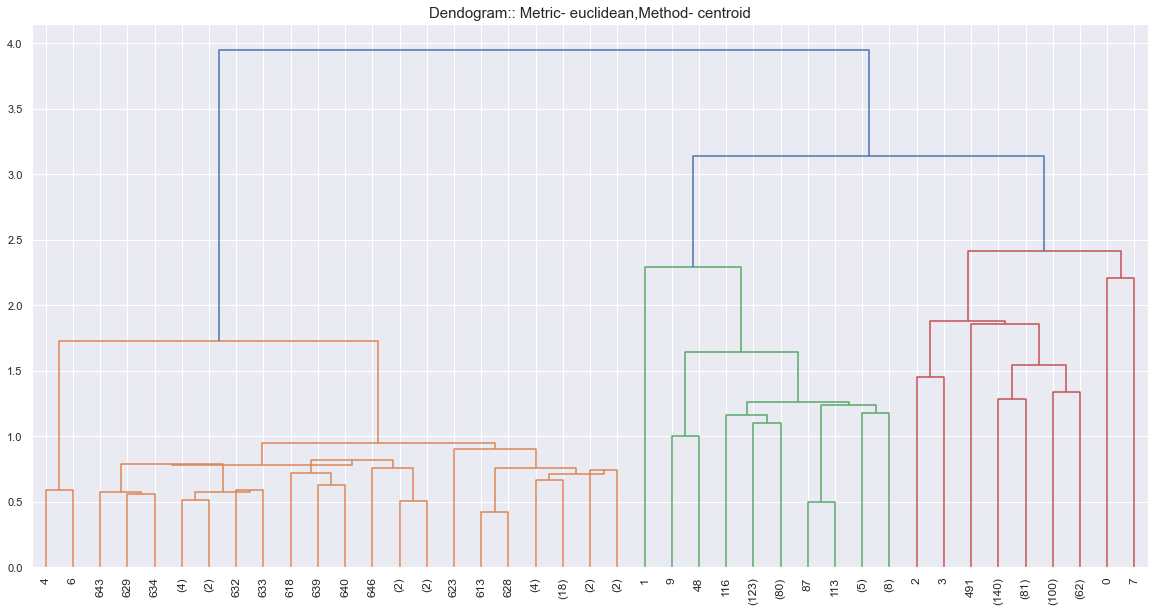

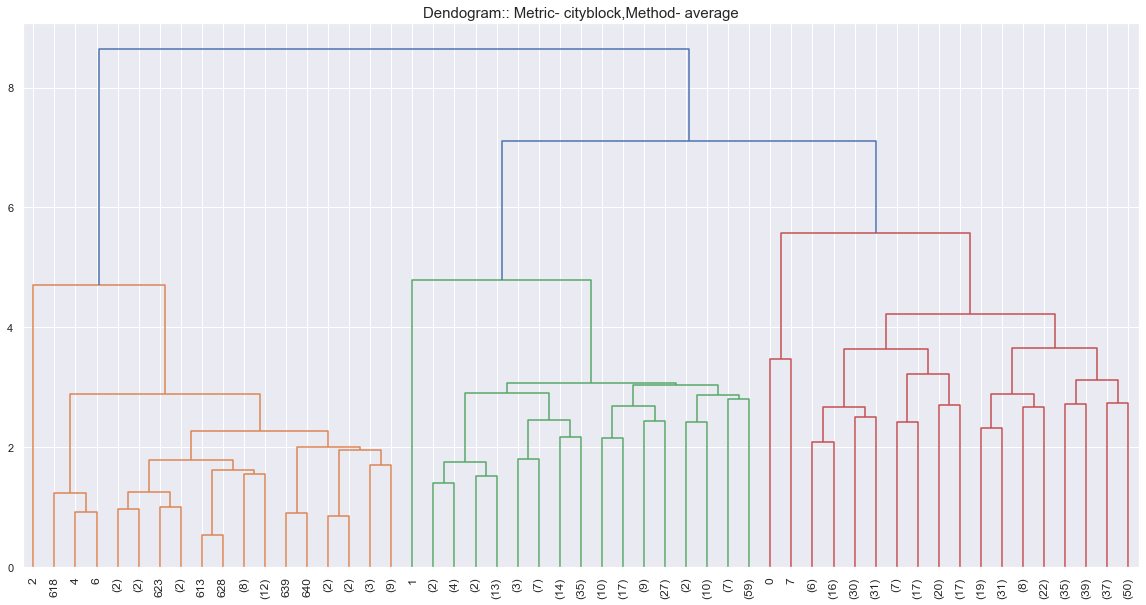

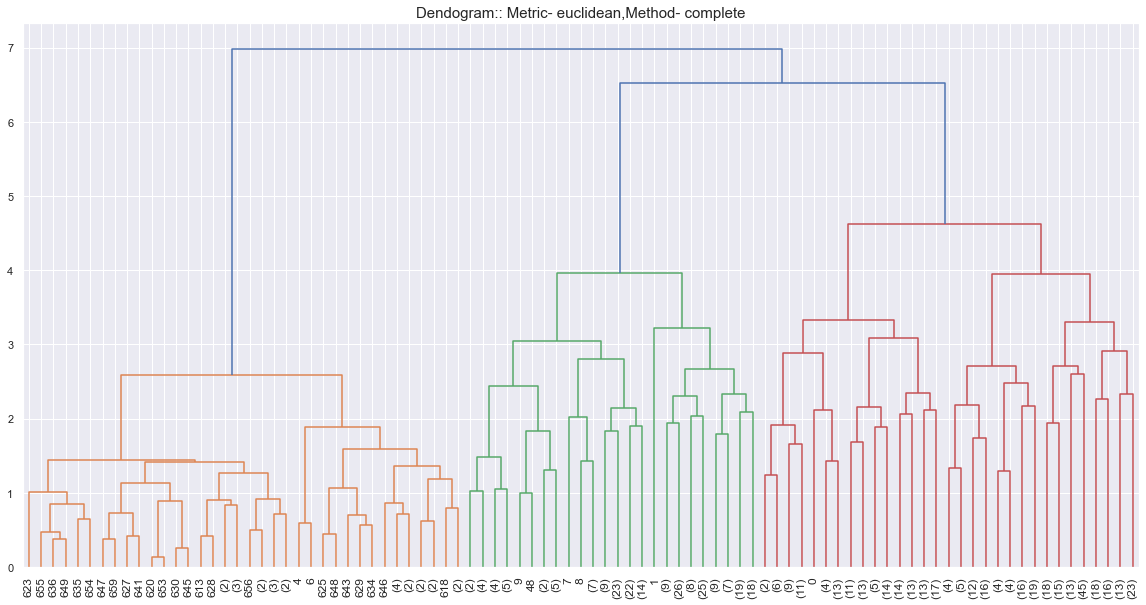

In [38]:
for metc, meth in [('euclidean','average'),('chebyshev','average'),('euclidean','centroid'),('cityblock','average'),\
                  ('euclidean','complete')]:
    
    Z = linkage(cust, metric=metc, method=meth)

    title = "Dendogram:: Metric- {},Method- {}".format(metc,meth)
    plt.figure(figsize=(20, 10))
    
    dendrogram(Z, p=6, truncate_mode='level',
           leaf_rotation=90,  # rotates the x axis labels
           leaf_font_size=12)
    plt.title(title, fontsize=15)
    plt.show()

<font color='green'>**Observation:**
- Analyzing all dendograms above there seems to be 3- 7 distinct clusters
- Below are the counts beyond which distances are getting dense
1. Euclidian: Average - 2 to 5 clusters
2. Chebyshev: Average - 2 to 4 clusters
3. Euclidean: Centroid - 2 to 5 cluster
4. Cityblock: Average - 2 to 7 clusters
5. Euclidean: Complete 2 to 6 clusters
</font>

In [39]:
# checking best silhouette score for different metric, method and clusters formed


dfSilScore = pd.DataFrame(columns=['Metric','Method','cluster','silhouette_score'])

for metc, meth, cll, clh in [('euclidean','average',2,5),('chebyshev','average',2,4),('euclidean','centroid',2,5),\
                   ('cityblock','average',2,7),('euclidean','complete',2,6)]:
    
    Z = linkage(cust, metric=metc, method=meth)
    
    i=cll
    
    while i<=clh:
        clusters = fcluster(Z, i, criterion='maxclust')
        sil_sc=metrics.silhouette_score(cust, clusters, metric=metc,random_state=7)
        
        score = {'Metric':metc,'Method':meth,'cluster':i,'silhouette_score':sil_sc}
        dfSilScore = dfSilScore.append(score, ignore_index=True)
        
        i+=1

dfSilScore.sort_values(by='silhouette_score', ascending=False)

,Metric,Method,cluster,silhouette_score
12,cityblock,average,3,0.517102
1,euclidean,average,3,0.483947
18,euclidean,complete,3,0.483457
8,euclidean,centroid,3,0.483438
5,chebyshev,average,3,0.438131
11,cityblock,average,2,0.419717
17,euclidean,complete,2,0.415561
0,euclidean,average,2,0.415561
7,euclidean,centroid,2,0.415561
13,cityblock,average,4,0.402495


<font color='green'>**Observation:**
- Cityblock, Average with three clusters gives the best Silhouette score against all other metrics and methods
- This also gives much better Silhouette score compared to K means with 4 clusters
- As hierarchical clustering suggests 3 clusters, let's rerun K-means for three clusters and see the results for comparison

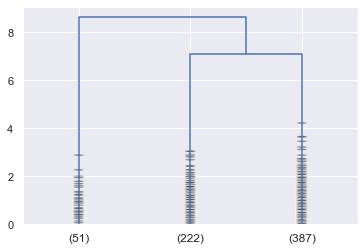

In [40]:
#Final dendogram

Z = linkage(cust, metric='cityblock', method='average')
clusters = fcluster(Z, 3, criterion='maxclust')

dendrogram(Z, p=3, truncate_mode='lastp', show_leaf_counts=True,show_contracted = True)

plt.show()

In [41]:
# create a dataframe and assign cluster labels

df_labeled_hierarchical = cust.copy()
df_labeled_hierarchical['labels']= clusters

df_labeled_hierarchical

,Total_Credit_Cards,Total_visits_bank,Total_calls_made,log_Avg_Credit_Limit,log_Total_visits_online,labels
0,-1.249225,-0.860451,-1.251537,1.630478,-0.468807,3
1,-0.787585,-1.473731,1.891859,0.885387,1.937062,2
2,1.058973,-0.860451,0.145528,0.885387,0.509415,1
3,0.135694,-0.860451,0.145528,0.336281,-0.468807,3
4,0.597334,-1.473731,-0.203739,1.630478,2.172822,1
...,...,...,...,...,...,...
655,2.443892,-0.860451,-1.251537,1.619674,1.937062,1
656,2.443892,-0.860451,-0.553005,1.443058,2.277409,1
657,1.520613,-0.860451,-0.902271,2.029885,1.802554,1
658,2.443892,-0.860451,-1.251537,2.213443,2.465858,1


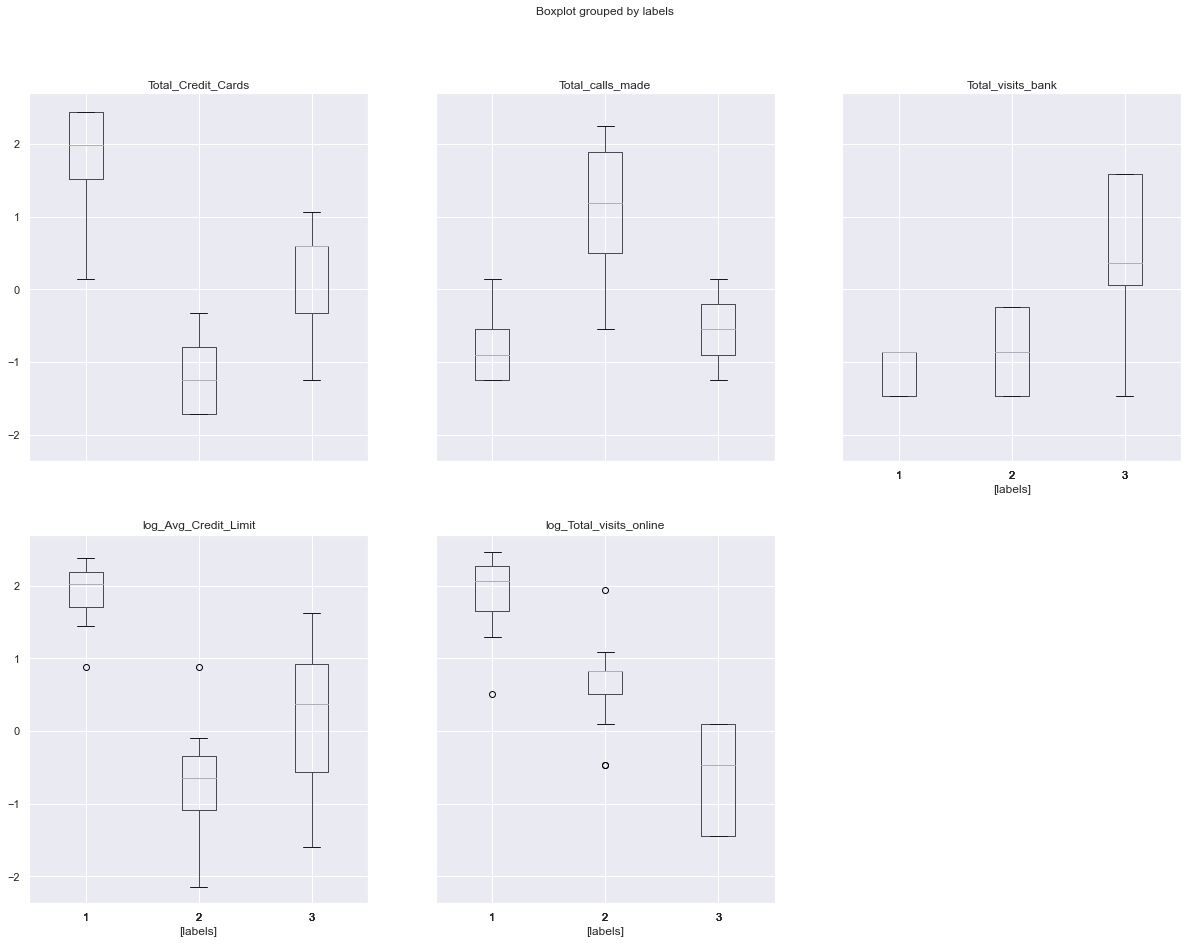

In [42]:
# Boxplot for the created labels

df_labeled_hierarchical.boxplot(by = 'labels',  layout=(2,3), figsize=(20, 15));

<font color='green'>**Observation:**
- Bloxplots are creating distinc groups for most of the featutes with some overlap
- Total calls made and Total Visits bank has some overlapping values between clusters

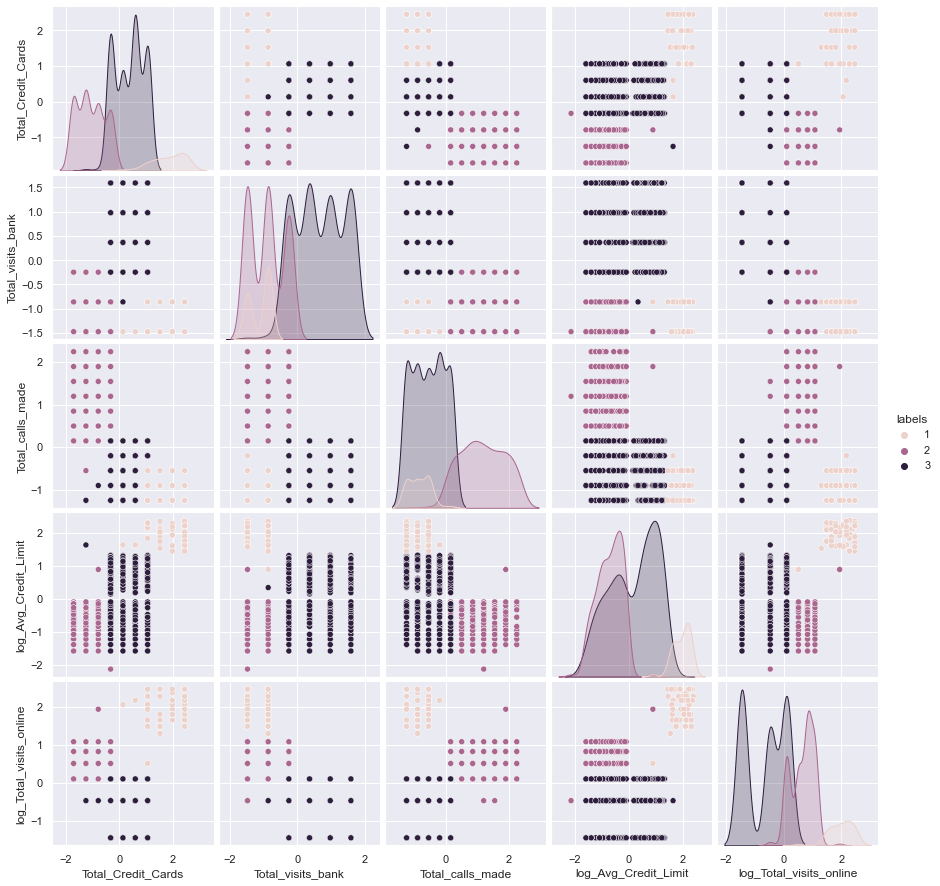

In [43]:
# Checking how clusters are being formed by pairplot

sns.pairplot(df_labeled_hierarchical, diag_kind='kde',hue='labels');

### 6. K-means clustering: for 3 clusters

In [44]:
#Set the value of k=3 for kmeans

kmeans = KMeans(n_clusters=3, n_init = 15, random_state=7)

kmeans.fit(cust)

KMeans(n_clusters=3, n_init=15, random_state=7)

In [45]:
#Clculate the centroids for the columns

centroids = kmeans.cluster_centers_

centroids

array([[ 1.84647615, -1.10095265, -0.85433262,  1.94529187,  1.97641919],
       [-1.05431026, -0.89861028,  1.14365291, -0.7309905 ,  0.63738071],
       [ 0.3725248 ,  0.67274974, -0.55664307,  0.16995567, -0.63595843]])

In [46]:
# Put centroids in a dataframe

centroid_df = pd.DataFrame(centroids, columns = list(cust))

In [47]:
centroid_df

,Total_Credit_Cards,Total_visits_bank,Total_calls_made,log_Avg_Credit_Limit,log_Total_visits_online
0,1.846476,-1.100953,-0.854333,1.945292,1.976419
1,-1.054310,-0.898610,1.143653,-0.730991,0.637381
2,0.372525,0.672750,-0.556643,0.169956,-0.635958


In [48]:
## creating a new dataframe only for labels and converting it into categorical variable

df_labels_kmeans = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels_kmeans['labels'] = df_labels_kmeans['labels'].astype('category')

# Get label for each point and add back to dataframe

In [49]:
# Joining the label dataframe with the data frame.

df_labeled_kmeans = cust.join(df_labels_kmeans)

df_labeled_kmeans

,Total_Credit_Cards,Total_visits_bank,Total_calls_made,log_Avg_Credit_Limit,log_Total_visits_online,labels
0,-1.249225,-0.860451,-1.251537,1.630478,-0.468807,2
1,-0.787585,-1.473731,1.891859,0.885387,1.937062,1
2,1.058973,-0.860451,0.145528,0.885387,0.509415,0
3,0.135694,-0.860451,0.145528,0.336281,-0.468807,2
4,0.597334,-1.473731,-0.203739,1.630478,2.172822,0
...,...,...,...,...,...,...
655,2.443892,-0.860451,-1.251537,1.619674,1.937062,0
656,2.443892,-0.860451,-0.553005,1.443058,2.277409,0
657,1.520613,-0.860451,-0.902271,2.029885,1.802554,0
658,2.443892,-0.860451,-1.251537,2.213443,2.465858,0


In [50]:
# checking counts per group

df_labeled_kmeans['labels'].value_counts()

2    384
1    225
0     51
Name: labels, dtype: int64

In [51]:
# Calculate Silhouette Coefficient

metrics.silhouette_score(cust, df_labeled_kmeans['labels'], metric='euclidean',random_state=7)

0.48356202958313216

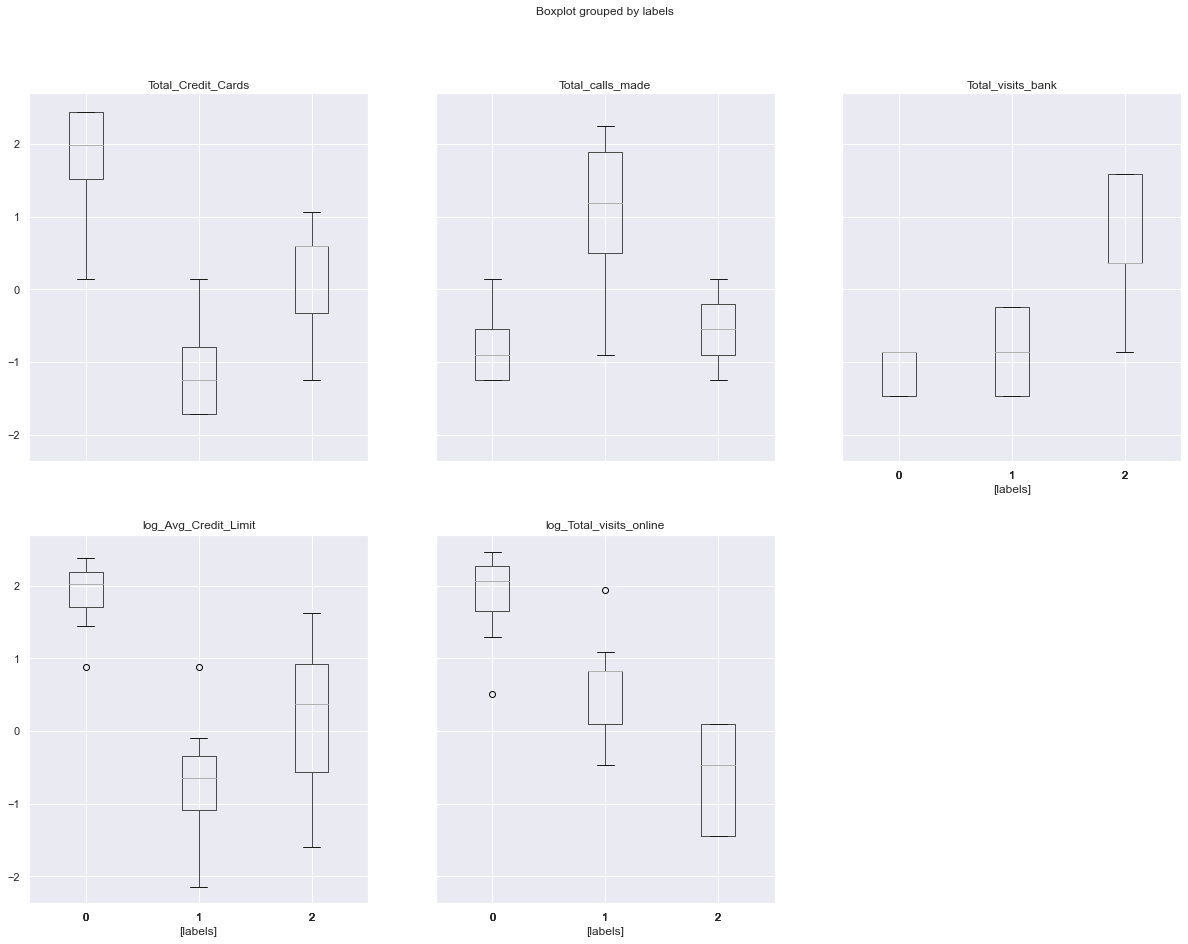

In [52]:
# Boxplot for the created labels

df_labeled_kmeans.boxplot(by = 'labels',  layout=(2,3), figsize=(20, 15));

<font color='green'>**Observation:**
- Bloxplots are creating distinc groups for most of the featutes with some overlap
- Total calls made and Total Visits bank has some overlapping values between clusters

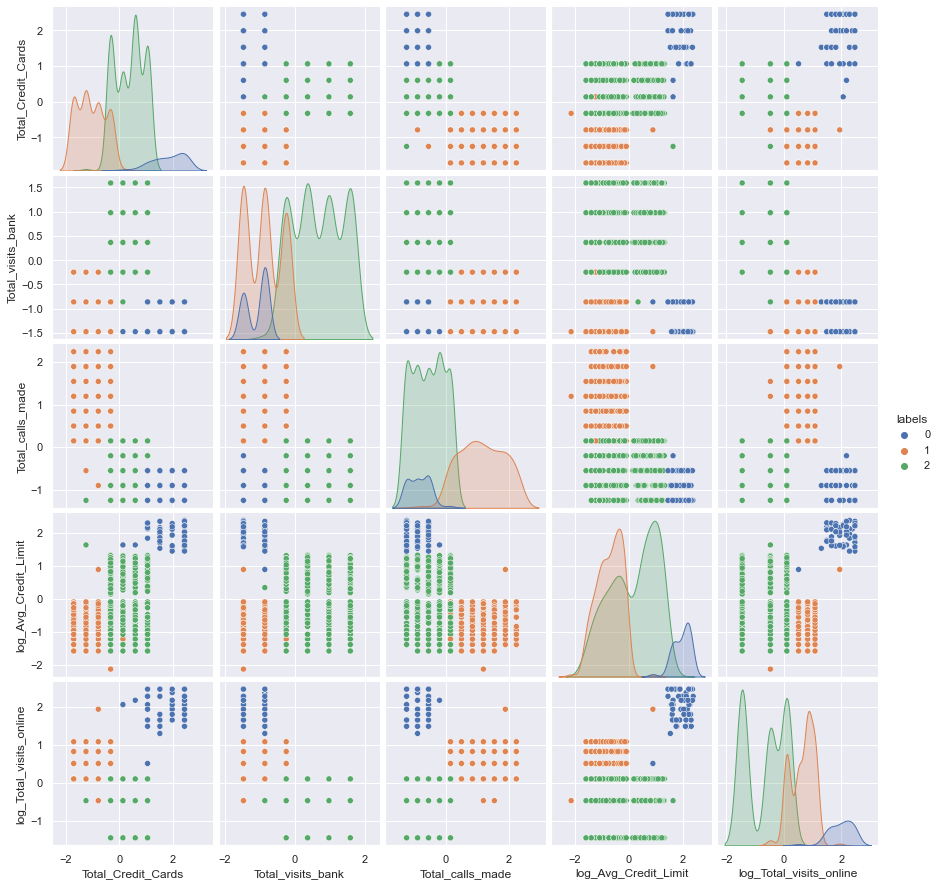

In [53]:
# Checking how clusters are being formed by pairplot

sns.pairplot(df_labeled_kmeans,diag_kind='kde',hue='labels');

### 7. Compare K-means clusters with Hierarchical clusters:

<font color='green'>**Observation:** </font>
- The three clusters formed by hierarchical and K-means looks similar, though there are few small differences
- Hierarchical cluster has 51, 222, 387 customers in the three clusters formed respectively
- K-means has 51, 225, 384 custers in the three clusters formed respectively
- Hierarchical cluster has a best Silhouette score of 0.517102 using cityblock metric and average method for linkage
- K-means has a Silhouette score of 0.483562 for euclidean metric
- So overall hierarchical performs little better over K-means for same number of clusters, whereas deciding the right number of clusters is a challenge in K-means as that is based on visual best guess

### 8. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions:

In [61]:
dfCustCluster = customer.copy()
dfCustCluster['cluster'] = df_labeled_hierarchical['labels']
dfCustCluster['TotalAttempt'] = dfCustCluster['Total_visits_bank'] + dfCustCluster['Total_visits_online'] + \
                                dfCustCluster['Total_calls_made']

dfCustCluster

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster,TotalAttempt
0,1,87073,100000,2,1,1,0,3,2
1,2,38414,50000,3,0,10,9,2,19
2,3,17341,50000,7,1,3,4,1,8
3,4,40496,30000,5,1,1,4,3,6
4,5,47437,100000,6,0,12,3,1,15
...,...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,1,11
656,657,60732,84000,10,1,13,2,1,16
657,658,53834,145000,8,1,9,1,1,11
658,659,80655,172000,10,1,15,0,1,16


##### 1. How many different segments of customers are there?
- 3

##### 2. How are these segments different from each other?

In [62]:
# Describe cluster 1

dfCustCluster[dfCustCluster['cluster']==1].drop(['Sl_No','Customer Key','cluster'],axis=1).describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,TotalAttempt
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,139254.901961,8.705882,0.607843,10.745098,1.137255,12.490196
std,36415.844429,1.285210,0.493089,3.058386,0.959575,3.042187
min,50000.000000,5.000000,0.000000,3.000000,0.000000,7.000000
25%,107000.000000,8.000000,0.000000,8.000000,0.000000,10.000000
50%,145000.000000,9.000000,1.000000,11.000000,1.000000,12.000000
75%,169000.000000,10.000000,1.000000,13.000000,2.000000,15.000000
max,200000.000000,10.000000,1.000000,15.000000,4.000000,18.000000


In [63]:
# Describe cluster 2

dfCustCluster[dfCustCluster['cluster']==2].drop(['Sl_No','Customer Key','cluster'],axis=1).describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,TotalAttempt
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,12184.684685,2.400901,0.932432,3.572072,6.909910,11.414414
std,5257.800896,1.099815,0.801544,1.207718,1.949821,2.460432
min,3000.000000,1.000000,0.000000,1.000000,2.000000,4.000000
25%,8000.000000,1.000000,0.000000,3.000000,5.000000,10.000000
50%,12000.000000,2.000000,1.000000,4.000000,7.000000,11.000000
75%,16000.000000,3.000000,2.000000,4.000000,9.000000,13.000000
max,50000.000000,4.000000,2.000000,10.000000,10.000000,19.000000


In [64]:
# Describe cluster 3

dfCustCluster[dfCustCluster['cluster']==3].drop(['Sl_No','Customer Key','cluster'],axis=1).describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,TotalAttempt
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,33622.739018,5.501292,3.483204,0.979328,1.997416,6.459948
std,22187.316074,1.145785,1.143398,0.851446,1.429697,2.003966
min,5000.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,13000.000000,4.000000,2.500000,0.000000,1.000000,5.000000
50%,31000.000000,6.000000,3.000000,1.000000,2.000000,6.000000
75%,52000.000000,6.000000,5.000000,2.000000,3.000000,8.000000
max,100000.000000,7.000000,5.000000,2.000000,4.000000,11.000000


<font color='green'>**Observation:** </font>
- 1st cluster with 51 customers has more number of credit cards with very high credit limits, they almost doesn't visit banks or makes very limited call, but visit online a lot, so most of the requirements they fulfil online
- 2nd cluster with 222 customers has very limited number of credit cards with low credit limit, they make limited bank visits but makes a lot of phone call and moderate online visits too
- 3rd cluster with 387 customers  has moderate number of credit cards and credit limit, they prefer to make bank visits over phone call or online, but their overall attempt to reach bank is low, so might be they are less engaged compared to the other two cluster. And this is the biggest chunk of customers.

##### 3. What are your recommendations to the bank on how to better market to and service these customers?

- Bank should look into some more data that will make more precise recommendations. To name few would be spending pattern of customers, usage of each credit card , type/ categorization of customer queries for support service
- Categorize and analyze the customer service requests to identify why there are so high volume of requests
- Check on the 3rd cluster customers if they are less engaged on generally facing less issues
- Educate the customers wherever needed
- Try to upsell more credit cards with new offers and features to 3rd cluster customers, eventually bringing them to 1St cluster
- Try to sell some premium credit cards to 1st cluster customers.